In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [26]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [4]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [5]:
for experiment in experiments:
    experiments[experiment] = pd.concat(experiments[experiment], axis=1)

## Analysis

#### Size

In [6]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['size-scalability'].columns if m in c]

In [7]:
metrics2columns

{'f1': ['500_f1', '2k_f1', '4k_f1', '8k_f1', '1k_f1'],
 'recall': ['500_recall', '2k_recall', '4k_recall', '8k_recall', '1k_recall'],
 'cost': ['500_cost', '2k_cost', '4k_cost', '8k_cost', '1k_cost'],
 'precision': ['500_precision',
  '2k_precision',
  '4k_precision',
  '8k_precision',
  '1k_precision'],
 'accuracy': ['500_accuracy',
  '2k_accuracy',
  '4k_accuracy',
  '8k_accuracy',
  '1k_accuracy']}

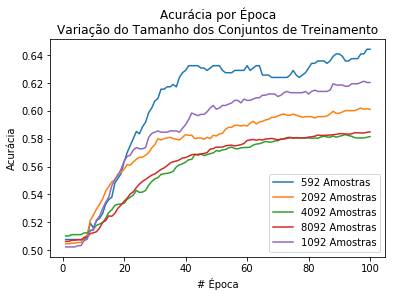

In [10]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['size-scalability']+"/size-accuracy.eps", format='eps')

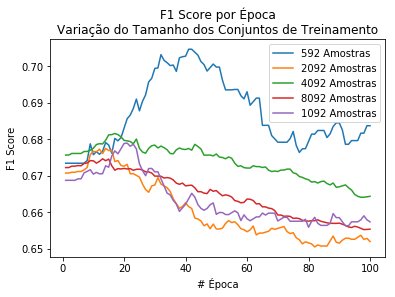

In [11]:
df = experiments['size-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("F1 Score por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("F1 Score")
plt.savefig(paths['size-scalability']+"/size-f1.eps", format='eps')

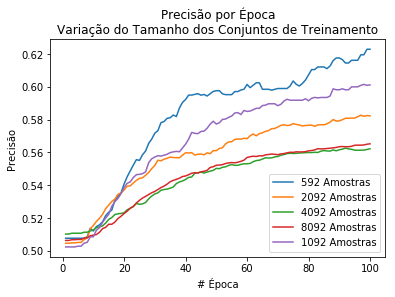

In [12]:
df = experiments['size-scalability'][metrics2columns['precision']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Precisão por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Precisão")
plt.savefig(paths['size-scalability']+"/size-precision.eps", format='eps')

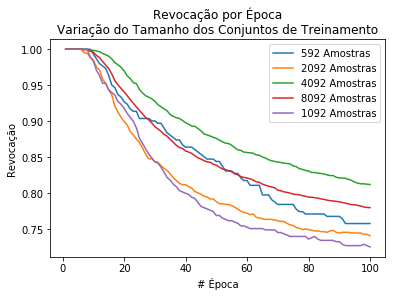

In [13]:
df = experiments['size-scalability'][metrics2columns['recall']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Revocação por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Revocação")
plt.savefig(paths['size-scalability']+"/size-recall.eps", format='eps')

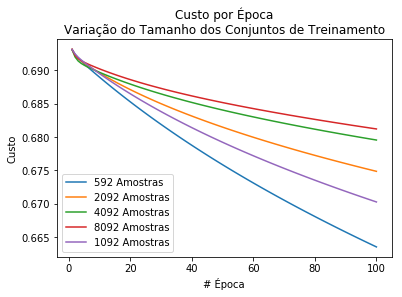

In [16]:
df = experiments['size-scalability'][metrics2columns['cost']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Custo por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Custo")
plt.savefig(paths['size-scalability']+"/size-cost.eps", format='eps')

#### Epochs

In [ ]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['epoch-scalability'].columns if m in c]

In [ ]:
metrics2columns

In [ ]:
df = experiments['epoch-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['epoch-scalability']+"/epoch-accuracy.eps", format='eps')

In [ ]:
df = experiments['epoch-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")

In [17]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[-1]

## Teste

In [47]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [48]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [49]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [56]:
experiments['size-scalability'][3].loc[-1]

8k_accuracy     0.551416
8k_precision    0.543060
8k_cost        -1.000000
8k_f1           0.628242
8k_recall       0.745117
Name: -1, dtype: float64

In [40]:
clean_df['f1']

,f1,f1,f1,f1,f1
epoch,,,,,
1,0.672190,0.672190,0.672190,0.672190,0.672190
2,0.672190,0.672190,0.672190,0.672190,0.672190
3,0.672577,0.672577,0.672577,0.672577,0.672577
4,0.672577,0.672577,0.672577,0.672577,0.672577
5,0.672742,0.672742,0.672742,0.672742,0.672742
6,0.672687,0.672687,0.672687,0.672687,0.672687
7,0.673300,0.673300,0.673300,0.673300,0.673300
8,0.673466,0.673466,0.673466,0.673466,0.673466
9,0.674091,0.674091,0.674091,0.674091,0.674091
